# **RFM SEGMENTATION**
Project Marketing and Customer Analytics

### **Business Understanding for RetailCo**

#### 1. Company Overview
RetailCO is a mid-sized retail company specializing in consumer goods, operating through multiple channels including in-store purchases, online sales, and direct marketing campaign. RetailCo offers a wide variety of products, including groceries, electronics, fashion and household items. The company aims to enhance customer satisfaction and increase profitability by understanding customer behavior and optimizing their marketing strategies.

#### 2. Business Objectives
The primary objective RetailCo is to increase customer retention and maximize customer lifetime value. By leveraging data analytics. RetailCo aims to :
- Identify high-value customers who are more likely to make repeat purchases.
- Optimize marketing efforts by targeting customers based on their purchasing behavior.
- Improve inventory management by understanding product demand patterns.
- Enhance customer experience through personalized marketing and promotions.

#### 3. Data Description
The data provided includes transactions details from RetailCo's sales over a specific period. The dataset contains the following key attributes:
- Date: The data when the transaction occured.
- Customer_ID : A unique identifier for each customer.
- Transaction_ID : A unique identifier for each transaction.
- SKU_Category : The category of the product purchased (e.g., electronics, groceries)
- SKU : Stock Keeping Unit, a unique identifier for each product.
- Quantity : The quantity of each product purchased in a transaction.
- Sales_Amount : The total sales amount of the transaction.

#### 4. Key Analytical Goals
RetailCo aims to use the data to perform RFM (Recency, Frequency, Monetary) analysis along with tenure metrics to better understand customer purchasing behavior:
- Recency : Number of days since the last purchase. This metric will help RetailCo identify customers who have recently interacted with the business and those who are at risk of churning.
- Frequency : The total number of transactions a customer has made. This will help determine loyal customers who frequently purchase products from RetailCo.
- Monetary : The total sales amount contributed by a customer. This helps in identifying high-value customers who contribute significantly to RetailCo's revenue.
- Tenure : The duration between a customer's first and last transaction. This metric provides insights into customer loyalty over time.

#### 5. Business Questions
How can we effectively segment our customer base to gain insights into their purchasing patterns and enhance our marketing strategies to boost engagement, loyalty, and overall sales?

#### 6. Define the Problem
1. What are the inputs? The inputs are transactional data.
2. What are the outputs? The outputs are distinct customer segments based on their purchasing behavior using RFM (Recency, Frequency, Monetary) and Tenure metrics.
3. What do we do with the segmentation? The segmentation allows the marketing and sales teams to tailor their strategies for each group:
- Offer personalized promotions or discounts to re-engage at-risk customers.
- Develop loyalty programs for high-value customers to encourage repeat purchases and maintain engagement.
- Suggest related or premium products to frequent buyers based on their purchase history.
- Implement onboarding campaigns for new customers to introduce them to popular products and special offers.
- Adjust communication frequency, channels, and messaging for different segments to increase relevance and response rates.

#### 7. Modelling Task
- Task : Clustering
- Model Used : Rangking based and K-Means
- Cluster Evaluations : Elbow method

### **Import Data**

In [1]:
#import library
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_and_clean_data(file_path):
    """
    Function to import dataset from a CSV file, clean, and preprocess it.

    Parameters
    ----------
    file_path : str
        The file path to the CSV file.

    Returns
    -------
    data : pandas DataFrame
        The cleaned dataset.
    """
    # Import dataset from the CSV file
    data = pd.read_csv(file_path, sep=',')
    
    # Drop the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])

    # Return the cleaned dataset
    return data

file_path = 'scanner_data.csv'
data = load_and_clean_data(file_path)

# Display the first few rows of the cleaned dataset
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


### **Exploratory Data Analysis**

In [3]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


The 'Date' column has a data type of object, so it should be converted to a datetime data type.

In [4]:
# Convert the 'Date' column to datetime format using the specified format '%d/%m/%Y'
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Convert the 'Date' column to datetime format, specifying that the day comes first and inferring the date format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, infer_datetime_format=True)

In [5]:
# Validate data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


In [6]:
data.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

No columns that contain null. Next, check the value count in each column.

#### **Check Date**

In [7]:
data['Date'].value_counts()

2016-09-23    638
2016-12-15    614
2016-09-22    606
2016-05-13    602
2016-12-16    594
             ... 
2016-07-31    128
2016-01-03    111
2016-08-28    107
2016-12-24    100
2016-03-28     73
Name: Date, Length: 363, dtype: int64

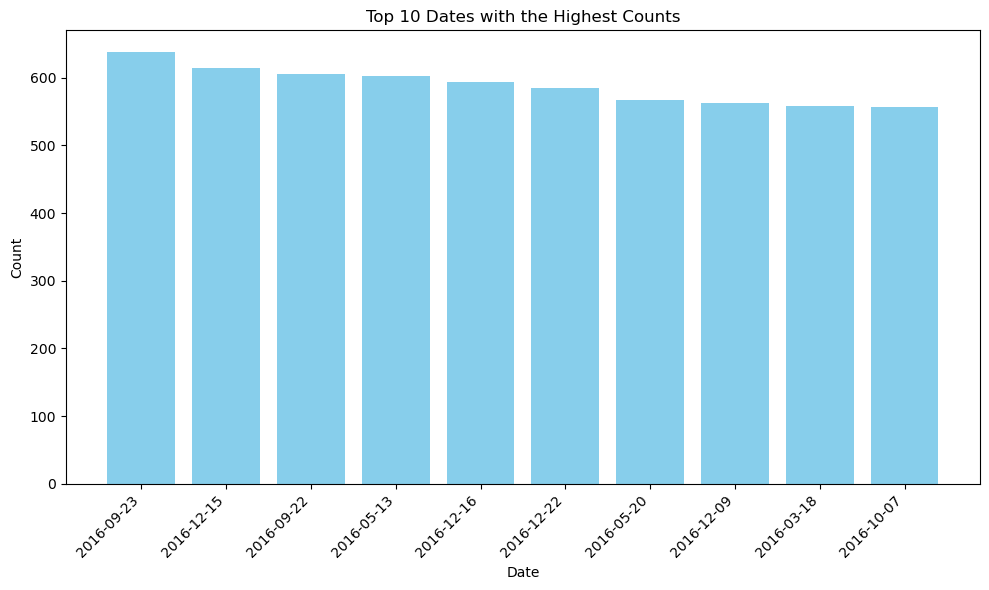

In [8]:
# Get the top 10 dates with the highest counts
top_10_dates = data['Date'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_dates.index.astype(str), top_10_dates.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Top 10 Dates with the Highest Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The dates with the highest transaction counts are at the top of the list, such as:
   - 2016-09-23: 638 transactions
   - 2016-12-15: 614 transactions
   - 2016-09-22: 606 transactions
   
   These dates indicate periods of peak activity, which could coincide with sales events, holidays, or promotional campaigns that drove a large number of transactions.

 2. At the bottom of the list, dates like 2016-03-28 had only 73 transactions, suggesting lower customer engagement or normal, non-promotional periods.
 
 3. The transactions are spread across 363 unique dates, suggesting that the data covers nearly a full year's worth of daily transactions, though some dates have significantly more activity than others.

#### **Check Customer_ID**

In [9]:
data['Customer_ID'].value_counts()

1660     228
1665     222
17104    218
1685     191
16905    179
        ... 
5906       1
21282      1
20192      1
21386      1
11733      1
Name: Customer_ID, Length: 22625, dtype: int64

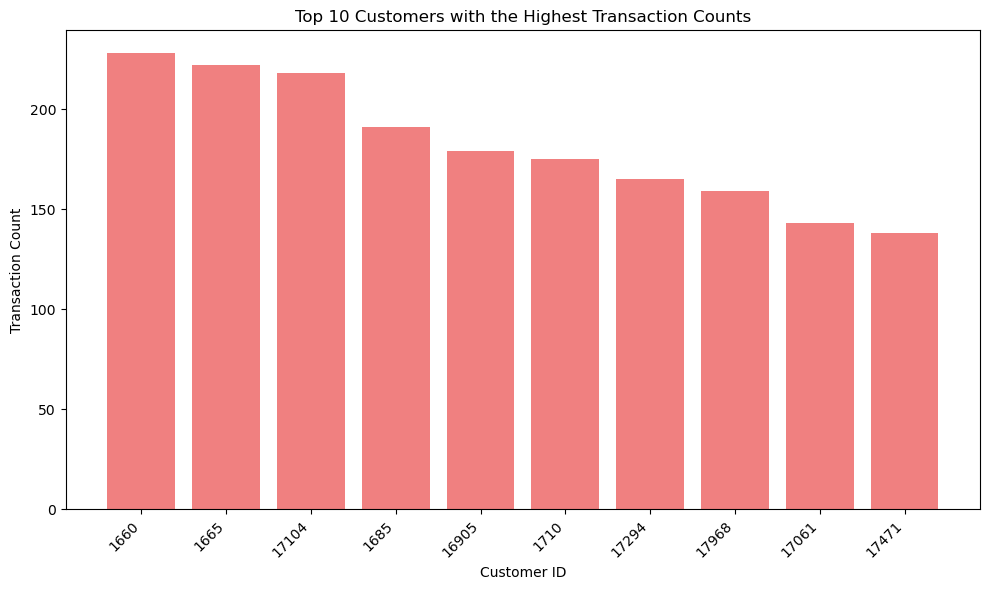

In [10]:
# Get the top 10 customers with the highest counts
top_10_customers = data['Customer_ID'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_customers.index.astype(str), top_10_customers.values, color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.title('Top 10 Customers with the Highest Transaction Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Customer_ID 1660 made the most transactions, with a total of 228. These top customers are highly engaged, likely contributing significantly to the overall sales. They may be ideal targets for loyalty programs or personalized marketing efforts.

2. Many `Customer_IDs` at the lower end of the list made only a single transaction, such as customers 5906, 21282, and 20192. This pattern suggests that a large portion of the customer base consists of one-time buyers.

3. There are 22.625 unique `Customer_IDs`, indicating a large and diverse customer base. This suggests that while the business has successfully acquired many customers, retention and repeat engagement are areas with significant potential for improvement.

#### **Check Transaction ID**

In [11]:
data['Transaction_ID'].value_counts()

1348     21
19098    21
42295    20
39032    19
28731    19
         ..
28442     1
28443     1
28447     1
28448     1
32342     1
Name: Transaction_ID, Length: 64682, dtype: int64

Some `Transaction_IDs` have unusually high counts, such as `Transaction_ID 1348` and `Transaction_ID 19098`, each appearing 21 times.

In [12]:
data[data['Transaction_ID'] == 1348]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
2664,2016-01-11,3719,1348,LPF,EFRI7,1.0,24.97
2665,2016-01-11,3719,1348,LPF,DMQID,1.0,10.73
2666,2016-01-11,3719,1348,8HU,X59YE,1.0,17.54
2667,2016-01-11,3719,1348,1EO,0SQIM,1.0,3.53
2668,2016-01-11,3719,1348,N8U,QGK3S,1.0,5.69
2669,2016-01-11,3719,1348,A38,W1ZMG,3.0,11.58
2670,2016-01-11,3719,1348,LDZ,IRQZ4,1.0,36.22
2671,2016-01-11,3719,1348,FU5,W53F2,3.0,3.65
2672,2016-01-11,3719,1348,OXH,7LJOW,3.0,7.20
2673,2016-01-11,3719,1348,1EO,707VJ,3.0,5.97


`Transaction_ID 1348` represents a single transaction involving multiple items. Each row for this Transaction_ID details a different SKU purchased in the same transaction, with specific quantities and sales amounts.

#### **Check SKU Category**

In [13]:
data['SKU_Category'].value_counts()

N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64

In [14]:
data.SKU_Category.value_counts(normalize=True).head()

N8U    0.082859
R6E    0.038715
LPF    0.038434
P42    0.036718
U5F    0.034698
Name: SKU_Category, dtype: float64

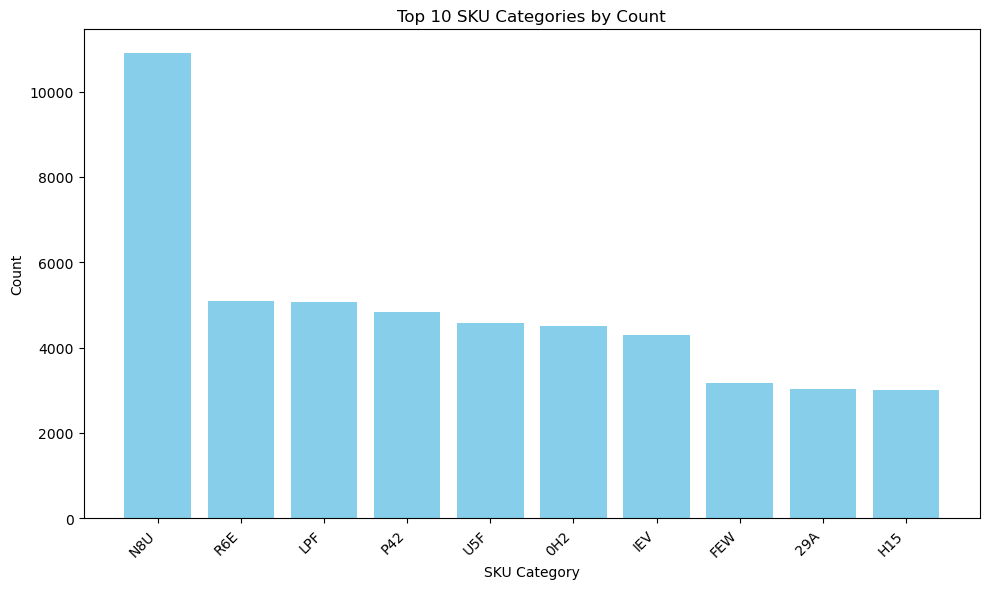

In [15]:
# Get the top 10 SKU categories with the highest counts
top_10_sku_categories = data['SKU_Category'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_sku_categories.index, top_10_sku_categories.values, color='skyblue')
plt.xlabel('SKU Category')
plt.ylabel('Count')
plt.title('Top 10 SKU Categories by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The `SKU_Category` with the highest count is `N8U`, appearing 10,913 times. This suggests that products within this category are the most frequently purchased or possibly the most popular among customers.
2. Many categories have very low counts, with some such as `M8H` appearing only 3 times, `U3N` 2 times, and `QON`, `2JO`, and `OTK` appearing just once. These could represent niche products or seasonal items.

#### **Check SKU**

In [16]:
data['SKU'].value_counts()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
DV08L       1
NXHF1       1
4YL6Q       1
T6EUH       1
9E9GV       1
Name: SKU, Length: 5242, dtype: int64

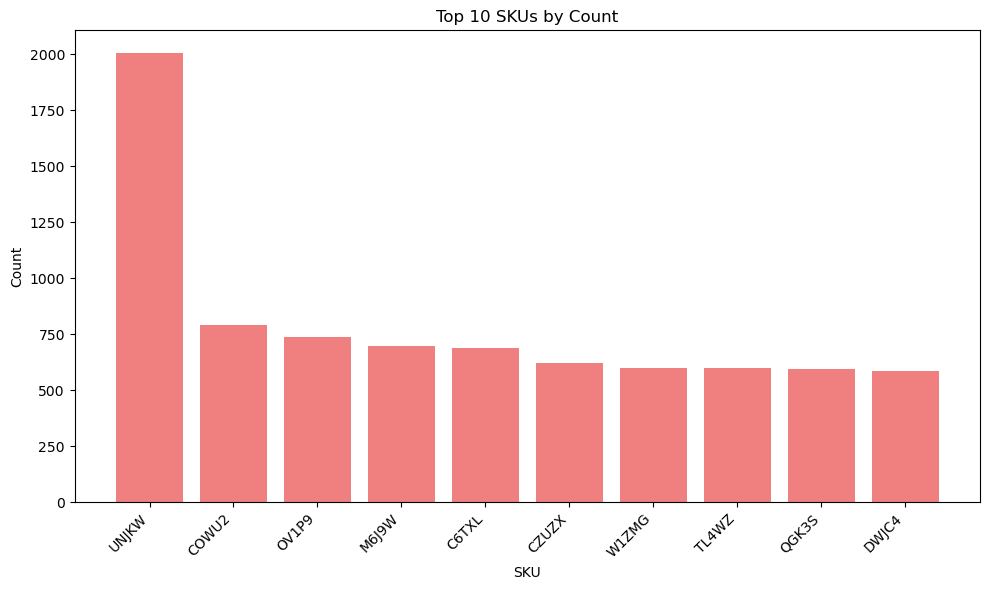

In [17]:
# Get the top 10 SKUs with the highest counts
top_10_skus = data['SKU'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_skus.index, top_10_skus.values, color='lightcoral')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.title('Top 10 SKUs by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The SKU `UNJKW` is the most frequently purchased, appearing 2,007 times. This indicates that `UNJKW` is a high-demand product and may be a best-seller or a staple item.
2. The dataset includes 5,242 unique SKUs, indicating a broad range of products. However, many SKUs appear infrequently.
3. Several SKUs appear only once (`DV08L`, `NXHF1`, `4YL6Q`, `T6EUH`, `9E9GV`). This could suggest that these items are either rare, specialized, or possibly new additions that haven’t yet gained traction.

#### **Check Quantity**

In [18]:
data['Quantity'].value_counts()

1.000    102741
2.000     20173
3.000      6150
4.000       954
5.000       326
          ...  
0.997         1
0.996         1
6.250         1
0.900         1
3.250         1
Name: Quantity, Length: 83, dtype: int64

In [19]:
below_one = data[data['Quantity'] < 1]
print(below_one)

             Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
125    2016-01-02         4122              76          SJS  4BPPU      0.67   
1111   2016-01-05         6543             547          PBV  8OXUS      0.34   
1289   2016-01-06          269             643          C3Y  OUWHY      0.25   
1290   2016-01-06          269             643          C3Y  RMOC0      0.25   
1504   2016-01-07         1568             757          XG4  JSLMY      0.10   
...           ...          ...             ...          ...    ...       ...   
128610 2016-07-25        17647           36344          PBV  NHSIQ      0.33   
128879 2016-07-26         1703           36460          SIM  9EZV7      0.50   
128916 2016-07-27        18060           36474          C3Y  HIWFG      0.25   
129067 2016-07-27        19479           36541          PBV  55TC6      0.33   
129377 2016-07-28        20309           36677          PBV  05ZN9      0.34   

        Sales_Amount  
125           11

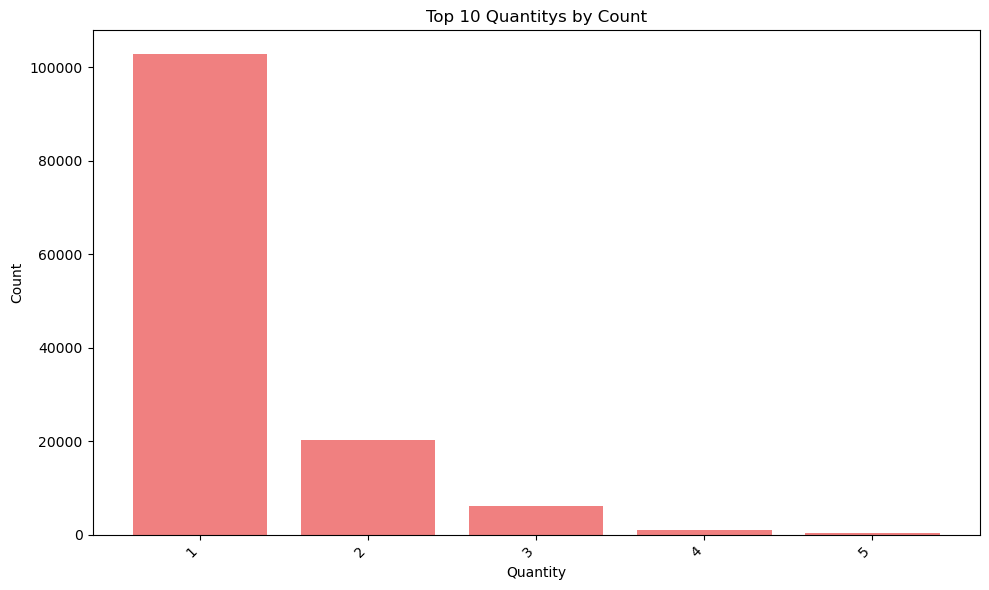

In [20]:
# Get the top 10 quantity with the highest counts
top_10_quantity = data['Quantity'].value_counts().nlargest(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_quantity.index, top_10_quantity.values, color='lightcoral')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Top 10 Quantitys by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

`1.000` is the most common quantity, with 102,741 occurrences. This indicates that single-unit purchases are extremely prevalent in the dataset. This might suggest that many transactions are for individual items rather than bulk purchases.

#### **Check Sales Amount**

In [21]:
data['Sales_Amount'].value_counts()

2.11      1852
6.75      1718
6.35      1283
4.57      1232
4.50      1185
          ... 
43.53        1
88.00        1
165.07       1
68.79        1
71.13        1
Name: Sales_Amount, Length: 3233, dtype: int64

1. The most common sales amounts are 2.11, 6.75, 6.35, 4.57, and 4.50, with frequencies of 1852, 1718, 1283, 1232, and 1185, respectively. These values occur most frequently in the dataset, suggesting they might represent common transaction values or price points for frequently purchased items.
2. Higher sales amounts like 43.53, 88.00, 165.07, 68.79, and 71.13 are much less common, each occurring only once in the dataset.

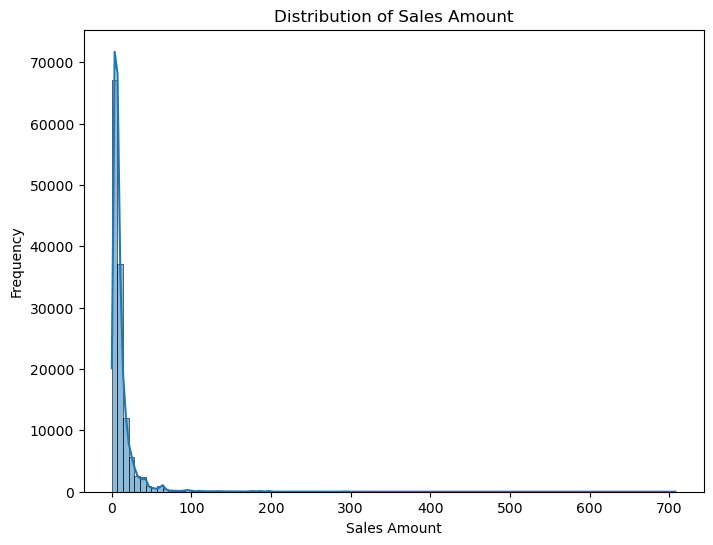

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales_Amount'], kde=True, bins=100)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

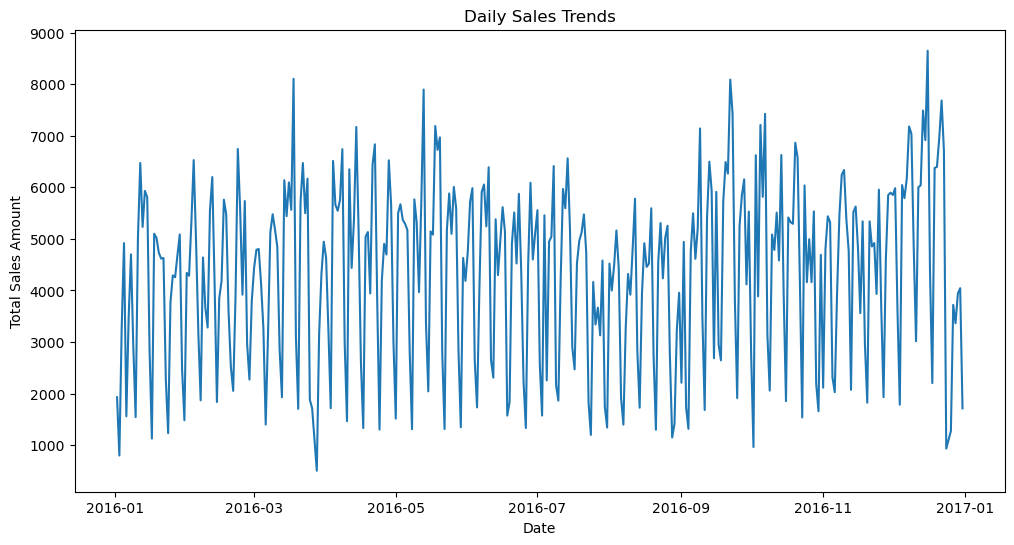

In [23]:
# Analyzing sales trends over time
daily_sales = data.groupby('Date').agg({
    'Sales_Amount': 'sum'
}).reset_index()

# Visualize daily sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales_Amount', data=daily_sales)
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

In [24]:
data.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524
std,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,0.010000,0.020000
25%,7349.000000,16134.000000,1.000000,4.230000
50%,13496.000000,32620.000000,1.000000,6.920000
75%,17306.000000,48548.000000,1.000000,12.330000
max,22625.000000,64682.000000,400.000000,707.730000


In [25]:
data.describe(include='all').T

C:\Users\UYUN\AppData\Local\Temp\ipykernel_13980\3536075253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,131706,363,2016-09-23 00:00:00,638,2016-01-02,2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,131706.0,NaN,NaN,NaN,NaT,NaT,12386.450367,6086.447552,1.0,7349.0,13496.0,17306.0,22625.0
Transaction_ID,131706.0,NaN,NaN,NaN,NaT,NaT,32389.604187,18709.901238,1.0,16134.0,32620.0,48548.0,64682.0
SKU_Category,131706,187,N8U,10913,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,131706,5242,UNJKW,2007,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,131706.0,NaN,NaN,NaN,NaT,NaT,1.485311,3.872667,0.01,1.0,1.0,1.0,400.0
Sales_Amount,131706.0,NaN,NaN,NaN,NaT,NaT,11.981524,19.359699,0.02,4.23,6.92,12.33,707.73


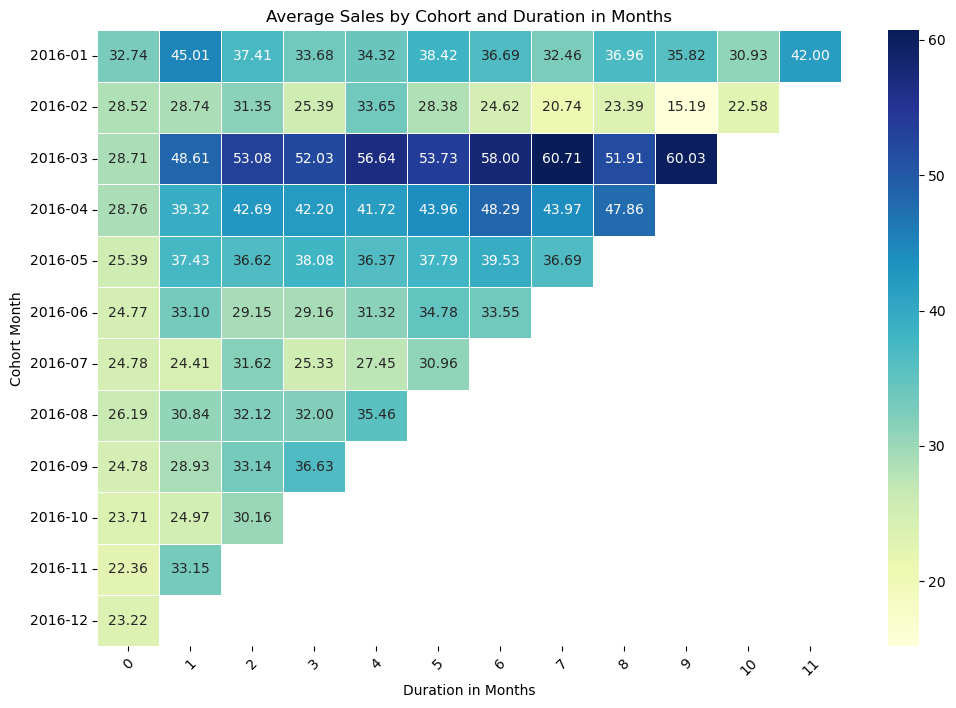

In [26]:
# Extract the first transaction month for each customer
data['CohortMonth'] = data.groupby('Customer_ID')['Date'].transform('min').dt.to_period('M')
data['TransactionMonth'] = data['Date'].dt.to_period('M')

# Calculate the number of months since the first transaction
data['CohortIndex'] = (data['TransactionMonth'].dt.year - data['CohortMonth'].dt.year) * 12 + \
                      (data['TransactionMonth'].dt.month - data['CohortMonth'].dt.month)

# Calculate total sales and customer count per cohort and cohort index
cohort_sales = data.groupby(['CohortMonth', 'CohortIndex'])['Sales_Amount'].sum().reset_index(name='TotalSales')
cohort_counts = data.groupby(['CohortMonth', 'CohortIndex'])['Customer_ID'].nunique().reset_index(name='CustomerCount')

# Merge sales and counts
cohort_data = pd.merge(cohort_sales, cohort_counts, on=['CohortMonth', 'CohortIndex'])
cohort_data['AverageSales'] = cohort_data['TotalSales'] / cohort_data['CustomerCount']

# Create a pivot table
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='AverageSales')

# Set the average sales for 0 months to the initial average
cohort_pivot.iloc[:,0] = cohort_pivot.iloc[:,0]

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title('Average Sales by Cohort and Duration in Months')
plt.xlabel('Duration in Months')
plt.ylabel('Cohort Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

The cohort analysis reveals patterns of customer engagement and retention that vary significantly by cohort. While early cohorts show better long-term retention, recent cohorts need attention to improve their average sales performance beyond the initial purchase.

In [27]:
data[data['Customer_ID'] == 1]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,CohortMonth,TransactionMonth,CohortIndex
7284,2016-01-22,1,3442,0H2,6OUVC,1.0,10.50,2016-01,2016-01,0
7285,2016-01-22,1,3442,N8U,CEBU8,1.0,5.79,2016-01,2016-01,0


In [28]:
print(f'First Transaction : {str(data["Date"].min())}')
print(f'Last Transaction  : {str(data["Date"].max())}')

First Transaction : 2016-01-02 00:00:00
Last Transaction  : 2016-12-31 00:00:00


Data consists of about 1 year of transaction data.

### **Create RFM Features**

Last transaction is 2016-12-31, so we can set 2017-01-01 as a possible reference days (not too far away from the day of the last transaction)

In [29]:
# Define the latest date for recency calculation
LATEST_DATE = pd.Timestamp('2017-01-01')

# Function to calculate recency
def recency(x):
    """
    Calculate recency based on the most recent date in the data.
    
    Parameters:
    x (pd.Series): Series of dates for a customer.
    
    Returns:
    int: Number of days since the most recent transaction.
    """
    return (LATEST_DATE - x.max()).days

# Function to calculate tenure
def tenure(x):
    """
    Calculate the tenure based on the range of transaction dates.
    
    Parameters:
    x (pd.Series): Series of dates for a customer.
    
    Returns:
    int: Number of days between the first and last transaction.
    """
    return (x.max() - x.min()).days

# Function to calculate frequency
def frequency(x):
    """
    Calculate the frequency of transactions for a customer.
    
    Parameters:
    x (pd.Series): Series of transaction identifiers (e.g., Transaction_ID) for a customer.
    
    Returns:
    int: Number of unique transactions.
    """
    return len(x.unique())

# Function to calculate monetary value
def monetary(x):
    """
    Calculate the monetary value based on the total sales amount for a customer.
    
    Parameters:
    x (pd.Series): Series of sales amounts for a customer.
    
    Returns:
    float: Total sales amount.
    """
    return x.sum()

# Function to calculate RFM metrics
def rfmts(data):
    """
    Calculate Recency, Frequency, and Monetary metrics for each customer.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing retail transactions with columns 'Date', 
                         'Customer_ID', 'Transaction_ID', 'Quantity', and 'Sales_Amount'.
    
    Returns:
    pd.DataFrame: DataFrame with Recency, Tenure, Frequency, and Monetary columns for each customer.
    """
    # Define aggregation functions
    agg_dict = {
        'Date': [recency, tenure],            # Apply recency and tenure functions to Date
        'Transaction_ID': frequency,          # Apply frequency function to Transaction_ID
        'Sales_Amount': monetary               # Apply monetary function to Sales_Amount
    }
    
    # Group by 'Customer_ID' and aggregate data
    rfmts = data.groupby('Customer_ID').agg(agg_dict)

    # Rename columns to match RFM metrics
    rfmts.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    # Ensure the index is of integer type (Customer_ID)
    rfmts.index = rfmts.index.astype('int')

    return rfmts

In [30]:
rfmts = rfmts(data = data)
rfmts.head()

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
1,345,0,1,16.29
2,196,87,2,22.77
3,365,0,1,10.92
4,53,121,2,33.29
5,180,147,5,78.82


In [31]:
# Check data shape in rfmts
print('RFM data shape :', rfmts.shape)

RFM data shape : (22625, 4)


In [32]:
# Check data shape in Customer_ID column
data["Customer_ID"].value_counts()

1660     228
1665     222
17104    218
1685     191
16905    179
        ... 
5906       1
21282      1
20192      1
21386      1
11733      1
Name: Customer_ID, Length: 22625, dtype: int64

The data is valid, the number of rows in RFM data is equal to number of unique **customer ID**.

In [33]:
rfmts.describe()

,Recency,Tenure,Frequency,Monetary
count,22625.000000,22625.000000,22625.000000,22625.000000
mean,162.097061,57.088751,2.858873,69.747563
std,115.923611,83.749195,4.000157,152.307769
min,1.000000,0.000000,1.000000,0.140000
25%,48.000000,0.000000,1.000000,10.170000
50%,150.000000,0.000000,1.000000,23.850000
75%,272.000000,93.000000,3.000000,63.070000
max,365.000000,364.000000,99.000000,3985.940000


There is no negative value of Recency, Tenure, Frequency and Monetary, all variables are valid. Next, plot the distribution.

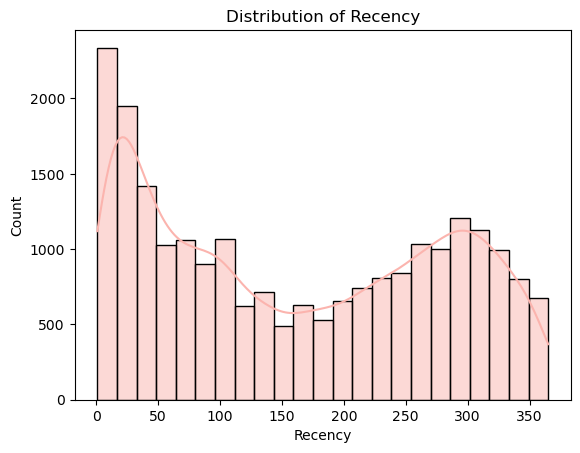

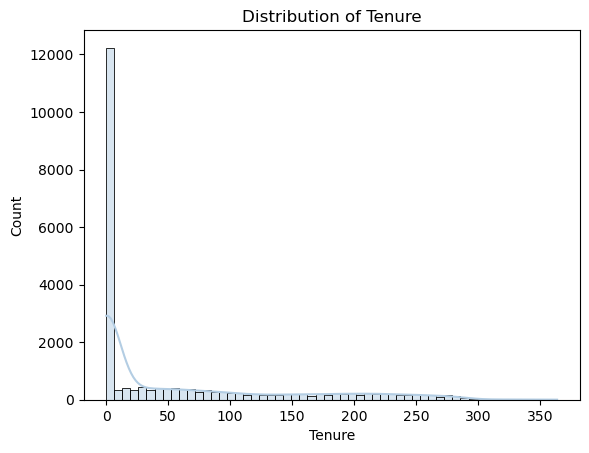

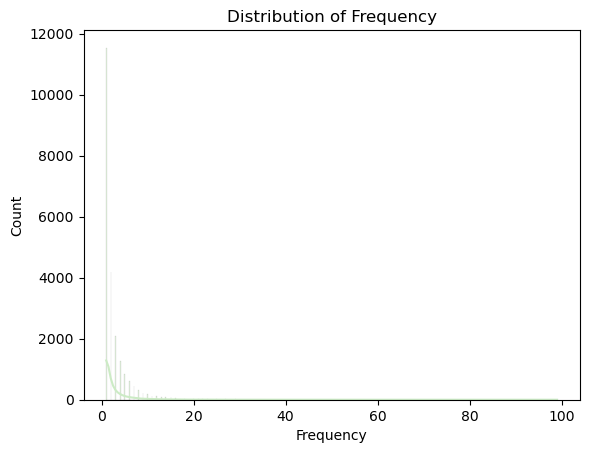

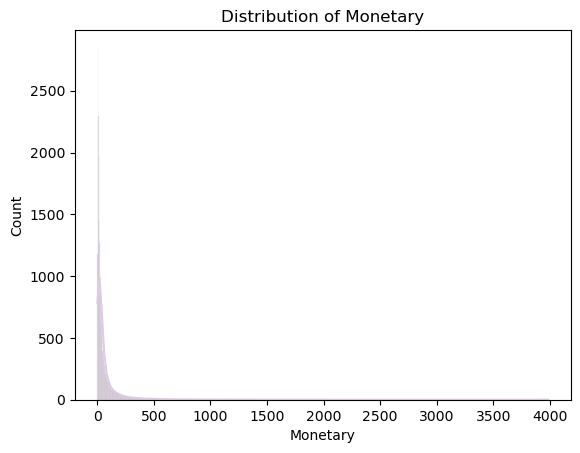

In [34]:
# Use a seaborn color palette
palette = sns.color_palette("Pastel1") 

# Initialize a counter for color selection
color_index = 0

for col in rfmts.columns:
    # Extract the data for the current column
    x = rfmts[col]
    
    # Use the current color from the palette
    color = palette[color_index % len(palette)]
    
    # Create a histogram plot of the column data with the selected color
    sns.histplot(x, kde=True, color=color)  # Explicitly pass the color to the plot
    
    # Set the title of the plot to the column name
    plt.title(f'Distribution of {col}')
    
    # Display the plot
    plt.show()
    
    # Increment the color index to use the next color from the palette
    color_index += 1

The Tenure, Frequency and Monetary data is skewed. Drop outlier.

In [35]:
def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame based on IQR for a specific column.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column (str): Column name from which to remove outliers.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed for the specified column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for non-outlier data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [36]:
# Apply outlier removal to tenure, frequency, and monetary columns
rfmts = remove_outliers_iqr(rfmts, 'Tenure')
rfmts = remove_outliers_iqr(rfmts, 'Frequency')
rfmts = remove_outliers_iqr(rfmts, 'Monetary')

# Display the cleaned data
print('EDA data shape :', rfmts.shape)
rfmts.describe()

EDA data shape : (18184, 4)


,Recency,Tenure,Frequency,Monetary
count,18184.000000,18184.000000,18184.000000,18184.000000
mean,177.452596,31.076716,1.684503,25.027259
std,112.650079,56.257316,1.096333,22.076842
min,1.000000,0.000000,1.000000,0.140000
25%,72.000000,0.000000,1.000000,8.430000
50%,182.000000,0.000000,1.000000,17.085000
75%,283.000000,41.000000,2.000000,35.210000
max,365.000000,232.000000,6.000000,98.620000


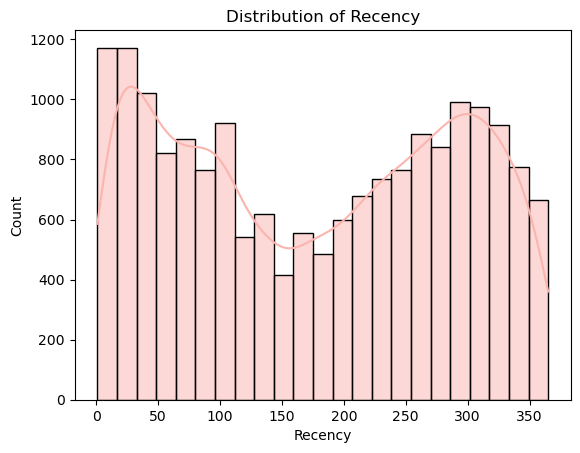

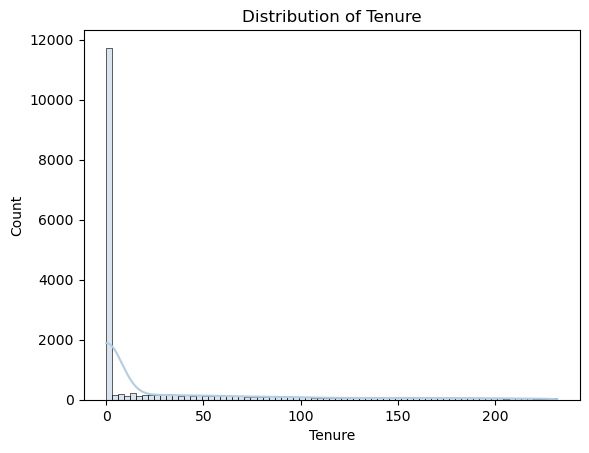

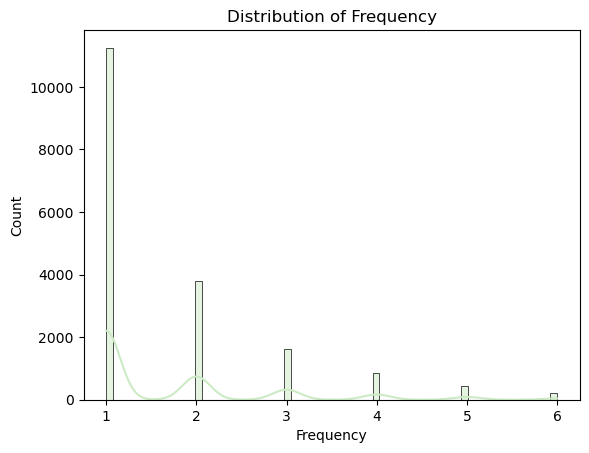

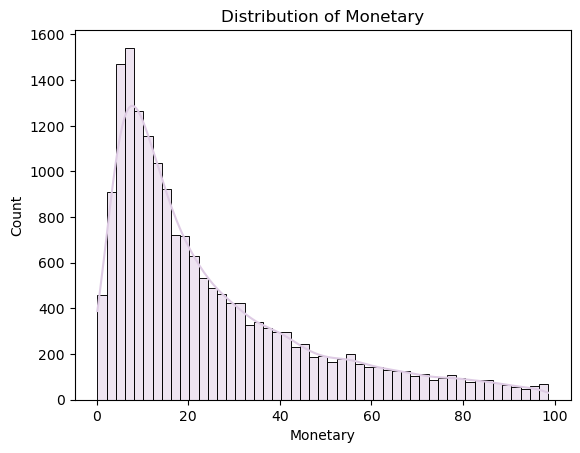

In [37]:
# Use a seaborn color palette
palette = sns.color_palette("Pastel1") 

# Initialize a counter for color selection
color_index = 0

for col in rfmts.columns:
    # Extract the data for the current column
    x = rfmts[col]
    
    # Use the current color from the palette
    color = palette[color_index % len(palette)]
    
    # Create a histogram plot of the column data with the selected color
    sns.histplot(x, kde=True, color=color)  # Explicitly pass the color to the plot
    
    # Set the title of the plot to the column name
    plt.title(f'Distribution of {col}')
    
    # Display the plot
    plt.show()
    
    # Increment the color index to use the next color from the palette
    color_index += 1

### **Normalize Data**

In [38]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Fit a MinMaxScaler to the data.

    Parameters:
    data (pd.DataFrame): DataFrame to fit the scaler on.

    Returns:
    MinMaxScaler: Fitted scaler object.
    """
    scaler = MinMaxScaler()  # Initialize the MinMaxScaler
    scaler.fit(data)         # Fit the scaler to the data

    return scaler

def trans_scaler(data, scaler):
    """
    Transform the data using the fitted scaler.

    Parameters:
    data (pd.DataFrame): DataFrame to be transformed.
    scaler (MinMaxScaler): Fitted scaler object.

    Returns:
    pd.DataFrame: Transformed DataFrame with scaled values.
    """
    # Apply transformation and create a new DataFrame
    data_clean = pd.DataFrame(scaler.transform(data))
    
    # Retain original index and column names
    data_clean.index = data.index
    data_clean.columns = data.columns

    return data_clean

In [39]:
# Prepare the data
features = ['Recency', 'Tenure', 'Frequency', 'Monetary']
rfmts_data_features = rfmts[features]

# Fit the scaler on the features
scaler = fit_scaler(rfmts_data_features)

# Transform the data using the fitted scaler
rfmts_data_scaled = trans_scaler(rfmts_data_features, scaler)

# Display the scaled data
print("Data shape :", rfmts_data_scaled.shape)
rfmts_data_scaled.head()

Data shape : (18184, 4)


,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
1,0.945055,0.000000,0.0,0.163993
2,0.535714,0.375000,0.2,0.229793
3,1.000000,0.000000,0.0,0.109464
4,0.142857,0.521552,0.2,0.336617
5,0.491758,0.633621,0.8,0.798944


### **Ranking**

In [40]:
binning_data = rfmts_data_scaled.copy()

Bin data into 4 bin, assume that the company can only afford to give marketing initiative for 4 clusters.

In [41]:
def bin_rfm(df):
    """
    Segments customers based on their Recency, Frequency, and Monetary (RFM) values into 4 bins
    and calculates an overall RFM score for each customer.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the RFM attributes - 'Recency', 'Frequency', and 'Monetary'.

    Returns:
    pandas.DataFrame: The input DataFrame with additional columns:
        - 'R_Group': The Recency group (1 to 4), with lower values indicating more recent purchases.
        - 'F_Group': The Frequency group (1 to 4), with higher values indicating more frequent purchases.
        - 'M_Group': The Monetary group (1 to 4), with higher values indicating higher spending.
        - 'RFM_Score': The average of the R, F, and M groups, representing overall customer value.
    """

    # Calculate quantiles for 4 bins
    quantiles = df.quantile(q=[0.25, 0.5, 0.75])

    # Define bins for each RFM attribute
    r_bins = [-np.inf] + list(quantiles['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['Frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['Monetary']) + [np.inf]

    # Define labels for the bins (1 to 4)
    labels = [1, 2, 3, 4]

    # Define reverse labels for Recency (4 to 1)
    labels_r = [4, 3, 2, 1]

    # Adjust labels dynamically to match the number of bins after dropping duplicates
    r_labels = labels_r[:len(np.unique(r_bins))-1]
    f_labels = labels[:len(np.unique(f_bins))-1]
    m_labels = labels[:len(np.unique(m_bins))-1]

    # Assign bins to RFM attributes with correct labels
    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=r_labels, duplicates='drop').astype(int)
    df['F_Group'] = pd.cut(df['Frequency'], bins=f_bins, labels=f_labels, duplicates='drop').astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=m_labels, duplicates='drop').astype(int)

    # Calculate the RFM score as the average of R, F, and M groups
    df['RFM_Score'] = np.round((df['R_Group'] + df['F_Group'] + df['M_Group']) / 3, 2)

    return df

binning_data = bin_rfm(binning_data)
binning_data.head()

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
Customer_ID,,,,,,,,
1,0.945055,0.000000,0.0,0.163993,1,1,2,1.33
2,0.535714,0.375000,0.2,0.229793,2,2,3,2.33
3,1.000000,0.000000,0.0,0.109464,1,1,2,1.33
4,0.142857,0.521552,0.2,0.336617,4,2,3,3.00
5,0.491758,0.633621,0.8,0.798944,3,3,4,3.33


In [42]:
binning_data.describe()

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
count,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000
mean,0.484760,0.133951,0.136901,0.252714,2.508304,1.554004,2.499725,2.187312
std,0.309478,0.242488,0.219267,0.224176,1.118329,0.769795,1.118212,0.725536
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.195055,0.000000,0.000000,0.084180,2.000000,1.000000,1.000000,1.670000
50%,0.497253,0.000000,0.000000,0.172065,3.000000,1.000000,2.500000,2.000000
75%,0.774725,0.176724,0.200000,0.356113,4.000000,2.000000,3.000000,2.670000
max,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,3.670000


In [43]:
def segmentation(rfm_df):
    """
    Segments customers based on their RFM score into predefined categories:
    - 'Low Value Customers': RFM score between 0 and 1.
    - 'Moderate Value Customers': RFM score between 1 and 2.
    - 'High Value Customers': RFM score between 2 and 3.
    - 'VIP Customers': RFM score between 3 and 4.

    Parameters:
    rfm_df (pandas.DataFrame): A DataFrame containing the RFM score under the column 'RFM_Score'.

    Returns:
    pandas.DataFrame: The input DataFrame with an additional 'Segmentation' column indicating customer segments.
    """

    # Define segmentation labels corresponding to RFM score ranges
    labels = [
        'Newbies Customers',       # RFM score 0-1
        'Growth Customers',        # RFM score 1-2
        'Valuable Customers',      # RFM score 2-3
        'Elite Customers'          # RFM score 3-4
    ]

    # Use pd.cut() to create the segmentation based on the defined bins and labels
    # The 'bins' parameter specifies the boundaries for each segment, matching the labels
    rfm_df['Segmentation'] = pd.cut(
        rfm_df['RFM_Score'],
        bins=[0, 1, 2, 3, 4],  # Define bins corresponding to each segment
        labels=labels          # Assign labels to each bin
    )

    return rfm_df

In [44]:
binning_data = segmentation(binning_data)
binning_data.head()

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segmentation
Customer_ID,,,,,,,,,
1,0.945055,0.000000,0.0,0.163993,1,1,2,1.33,Growth Customers
2,0.535714,0.375000,0.2,0.229793,2,2,3,2.33,Valuable Customers
3,1.000000,0.000000,0.0,0.109464,1,1,2,1.33,Growth Customers
4,0.142857,0.521552,0.2,0.336617,4,2,3,3.00,Valuable Customers
5,0.491758,0.633621,0.8,0.798944,3,3,4,3.33,Elite Customers


In [45]:
# Check and validate data
binning_data[binning_data['RFM_Score'] == 1]

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segmentation
Customer_ID,,,,,,,,,
11,0.925824,0.0,0.0,0.063058,1,1,1,1.0,Newbies Customers
15,0.980769,0.0,0.0,0.037368,1,1,1,1.0,Newbies Customers
18,0.950549,0.0,0.0,0.017872,1,1,1,1.0,Newbies Customers
22,0.964286,0.0,0.0,0.067120,1,1,1,1.0,Newbies Customers
31,0.782967,0.0,0.0,0.071284,1,1,1,1.0,Newbies Customers
...,...,...,...,...,...,...,...,...,...
17971,0.799451,0.0,0.0,0.056763,1,1,1,1.0,Newbies Customers
18000,0.793956,0.0,0.0,0.054021,1,1,1,1.0,Newbies Customers
18012,0.799451,0.0,0.0,0.065496,1,1,1,1.0,Newbies Customers


In [46]:
# Check and validate data
binning_data[binning_data['RFM_Score'] >= 2]

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segmentation
Customer_ID,,,,,,,,,
2,0.535714,0.375000,0.2,0.229793,2,2,3,2.33,Valuable Customers
4,0.142857,0.521552,0.2,0.336617,4,2,3,3.00,Valuable Customers
5,0.491758,0.633621,0.8,0.798944,3,3,4,3.33,Elite Customers
6,0.755495,0.000000,0.0,0.258022,2,1,3,2.00,Growth Customers
7,0.239011,0.000000,0.0,0.179732,3,1,3,2.33,Valuable Customers
...,...,...,...,...,...,...,...,...,...
22620,0.164835,0.000000,0.0,0.085906,4,1,2,2.33,Valuable Customers
22621,0.057692,0.000000,0.0,0.096974,4,1,2,2.33,Valuable Customers
22622,0.041209,0.000000,0.0,0.060215,4,1,1,2.00,Growth Customers


In [47]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:
    # inverse transform X
    x = binning_data[col]

    # Find index
    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]

    # Inverse transform
    binning_data[col] = x*(max_val-min_val) + min_val

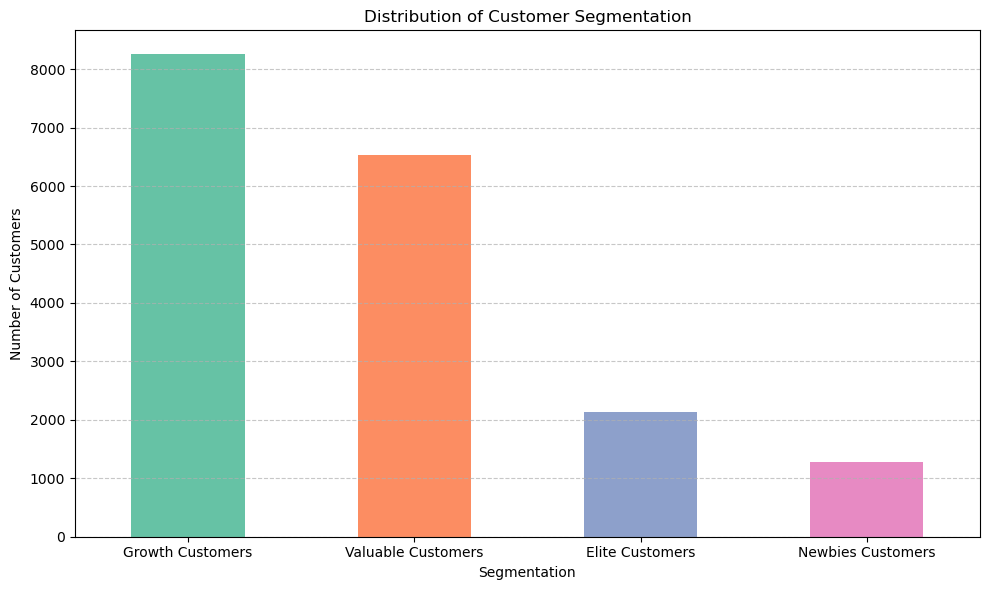

In [48]:
# Plotting the distribution of segmentation
plt.figure(figsize=(10, 6))
segmentation_counts = binning_data['Segmentation'].value_counts()

# Define a Seaborn color palette
palette = sns.color_palette("Set2")
segmentation_counts.plot(kind='bar', color=palette)

plt.title('Distribution of Customer Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

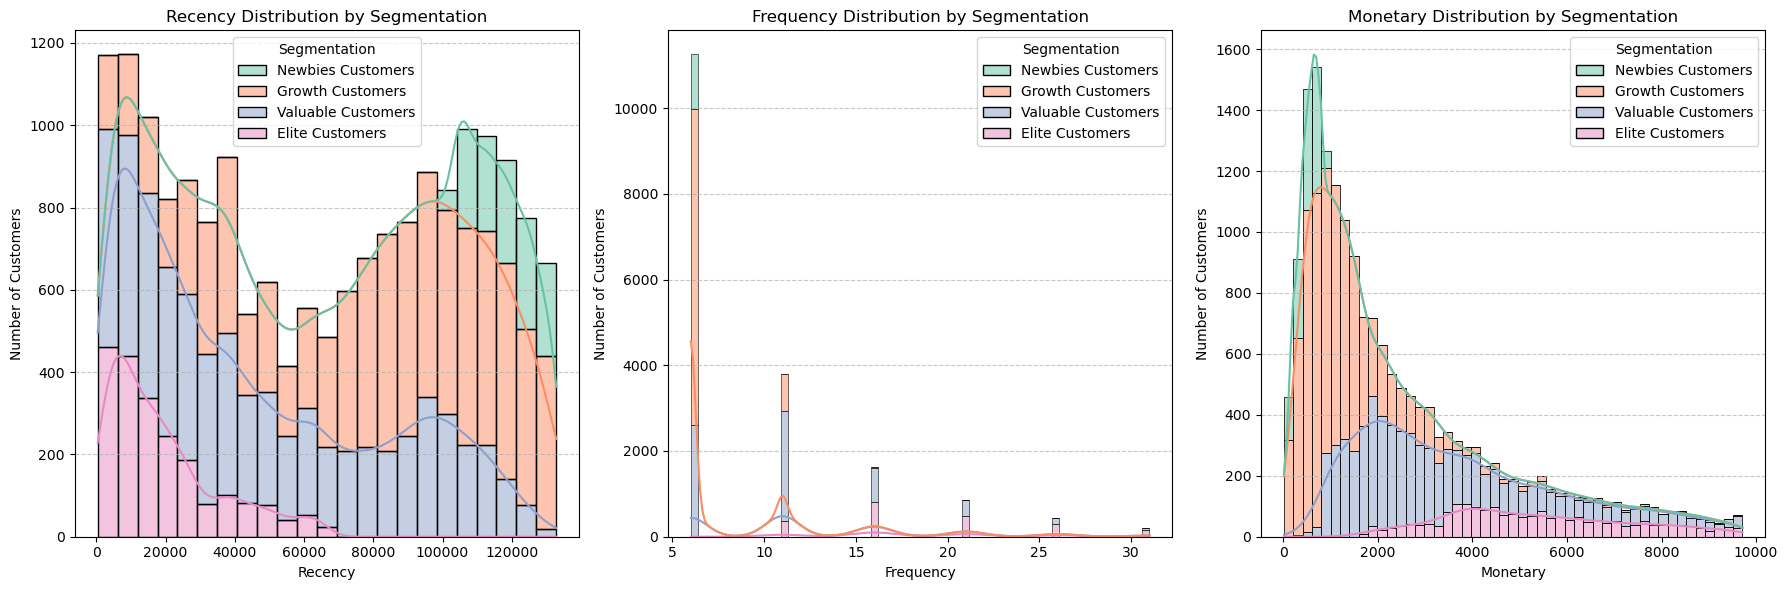

In [49]:
def inverse_transform_data(data_bin, scaler):
    """
    Reverts the scaled values in specified columns of a DataFrame back to their original scale.

    Parameters:
    data_bin (pandas.DataFrame): The DataFrame containing scaled data.
    scaler (sklearn.preprocessing.MinMaxScaler or similar): The scaler object used for scaling the data.

    Returns:
    pandas.DataFrame: The DataFrame with the specified columns transformed back to their original scale.
    """
    for col in ['Recency', 'Frequency', 'Monetary']:
        # Extract the scaled values for the current column
        x = data_bin[col]

        # Find the index of the current column in the scaler's feature names
        idx = scaler.feature_names_in_.tolist().index(col)

        # Retrieve the maximum and minimum values used for scaling
        max_val = scaler.data_max_[idx]
        min_val = scaler.data_min_[idx]

        # Perform the inverse transformation to revert the scaled values to their original scale
        data_bin[col] = x * (max_val - min_val) + min_val

    return data_bin

# Apply inverse transformation
binning_data = inverse_transform_data(binning_data, scaler)

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency distribution by Segmentation
sns.histplot(data=binning_data, x='Recency', hue='Segmentation', multiple='stack', ax=axes[0], palette='Set2', kde=True)
axes[0].set_title('Recency Distribution by Segmentation')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Number of Customers')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency distribution by Segmentation
sns.histplot(data=binning_data, x='Frequency', hue='Segmentation', multiple='stack', ax=axes[1], palette='Set2', kde=True)
axes[1].set_title('Frequency Distribution by Segmentation')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Number of Customers')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Monetary distribution by Segmentation
sns.histplot(data=binning_data, x='Monetary', hue='Segmentation', multiple='stack', ax=axes[2], palette='Set2', kde=True)
axes[2].set_title('Monetary Distribution by Segmentation')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Number of Customers')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

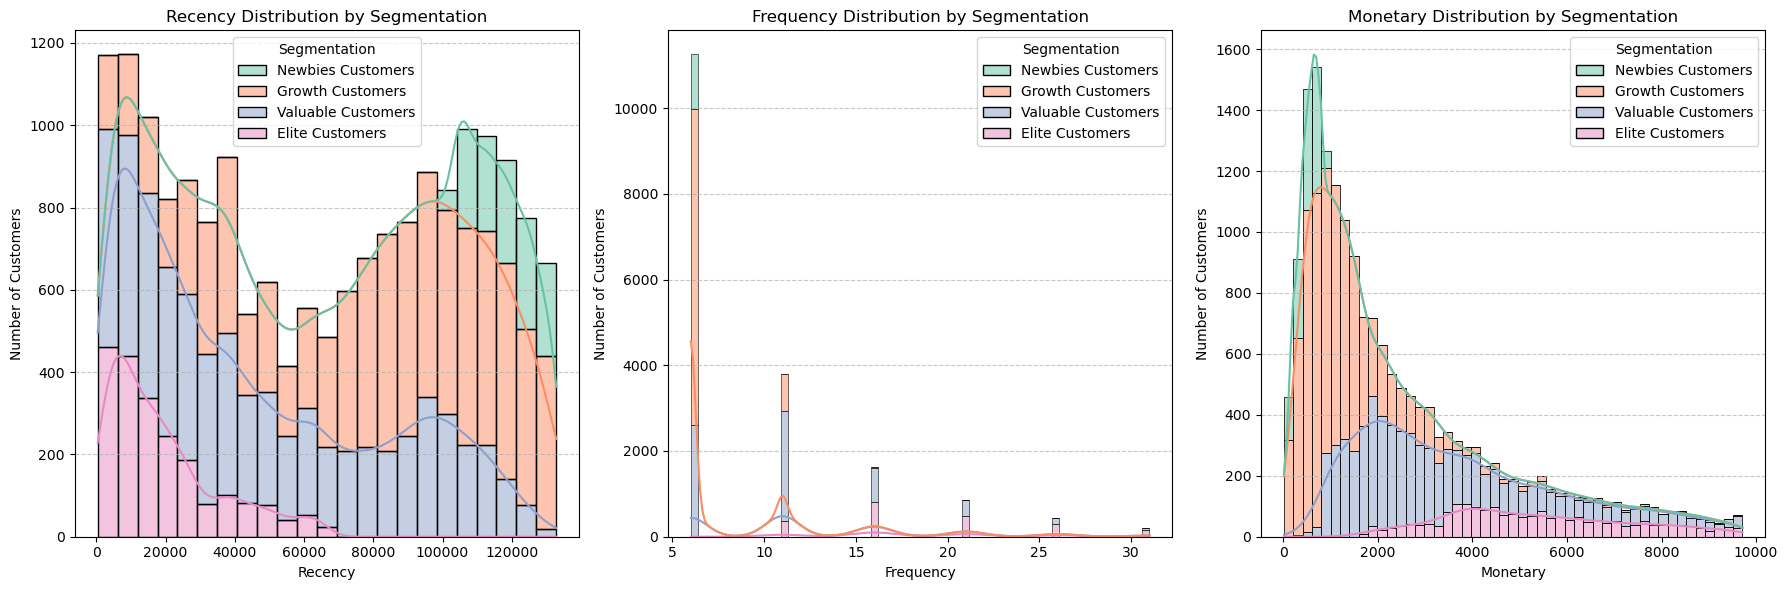

In [50]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency distribution by Segmentation
sns.histplot(data=binning_data, x='Recency', hue='Segmentation', multiple='stack', ax=axes[0], palette='Set2', kde=True)
axes[0].set_title('Recency Distribution by Segmentation')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Number of Customers')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Frequency distribution by Segmentation
sns.histplot(data=binning_data, x='Frequency', hue='Segmentation', multiple='stack', ax=axes[1], palette='Set2', kde=True)
axes[1].set_title('Frequency Distribution by Segmentation')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Number of Customers')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Monetary distribution by Segmentation
sns.histplot(data=binning_data, x='Monetary', hue='Segmentation', multiple='stack', ax=axes[2], palette='Set2', kde=True)
axes[2].set_title('Monetary Distribution by Segmentation')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Number of Customers')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_13980\688080683.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=binning_data, x='Frequency', hue='Segmentation', fill=True, common_norm=False, palette='Set2')


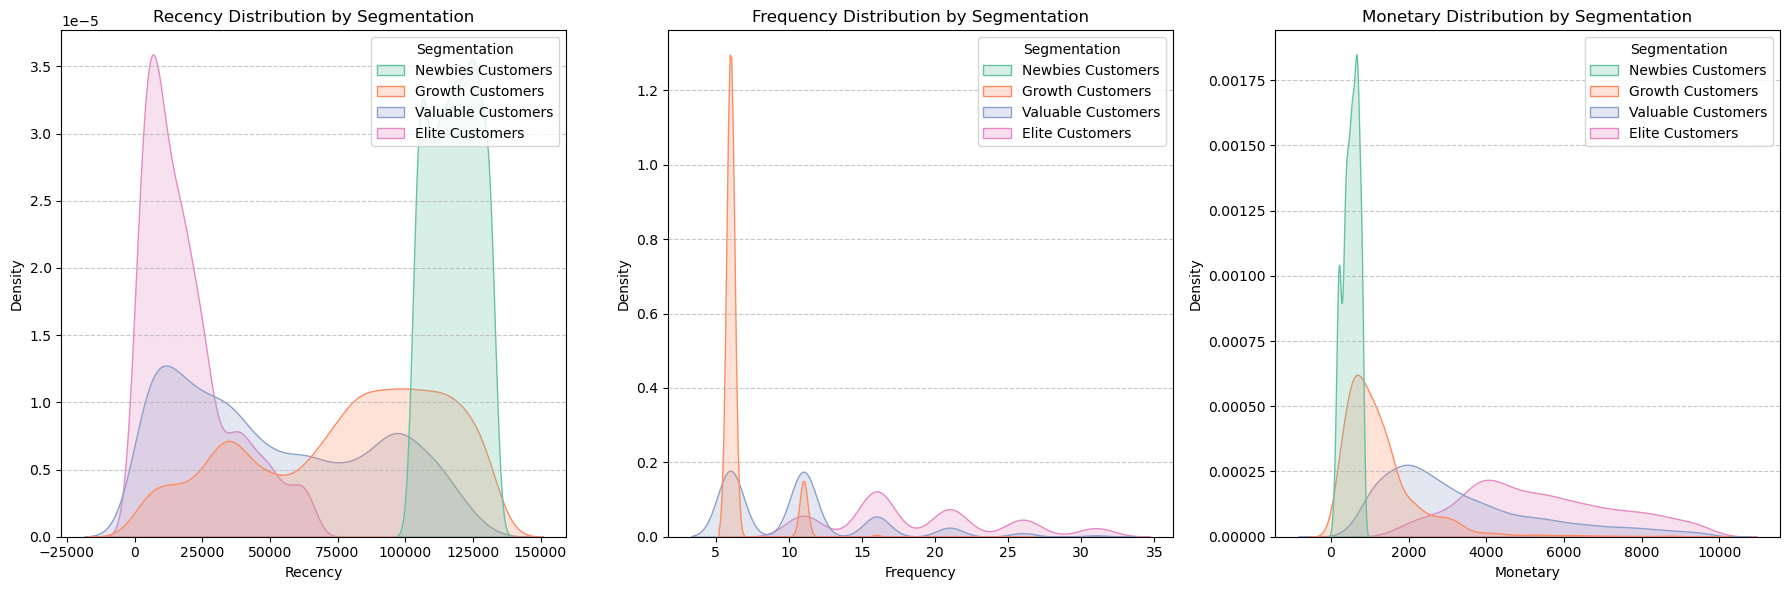

In [51]:
# Set up the figure with 3 subplots
plt.figure(figsize=(18, 6))

# Recency Distribution by Segmentation
plt.subplot(1, 3, 1)
sns.kdeplot(data=binning_data, x='Recency', hue='Segmentation', fill=True, common_norm=False, palette='Set2')
plt.title('Recency Distribution by Segmentation')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Frequency Distribution by Segmentation
plt.subplot(1, 3, 2)
sns.kdeplot(data=binning_data, x='Frequency', hue='Segmentation', fill=True, common_norm=False, palette='Set2')
plt.title('Frequency Distribution by Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Monetary Distribution by Segmentation
plt.subplot(1, 3, 3)
sns.kdeplot(data=binning_data, x='Monetary', hue='Segmentation', fill=True, common_norm=False, palette='Set2')
plt.title('Monetary Distribution by Segmentation')
plt.xlabel('Monetary')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

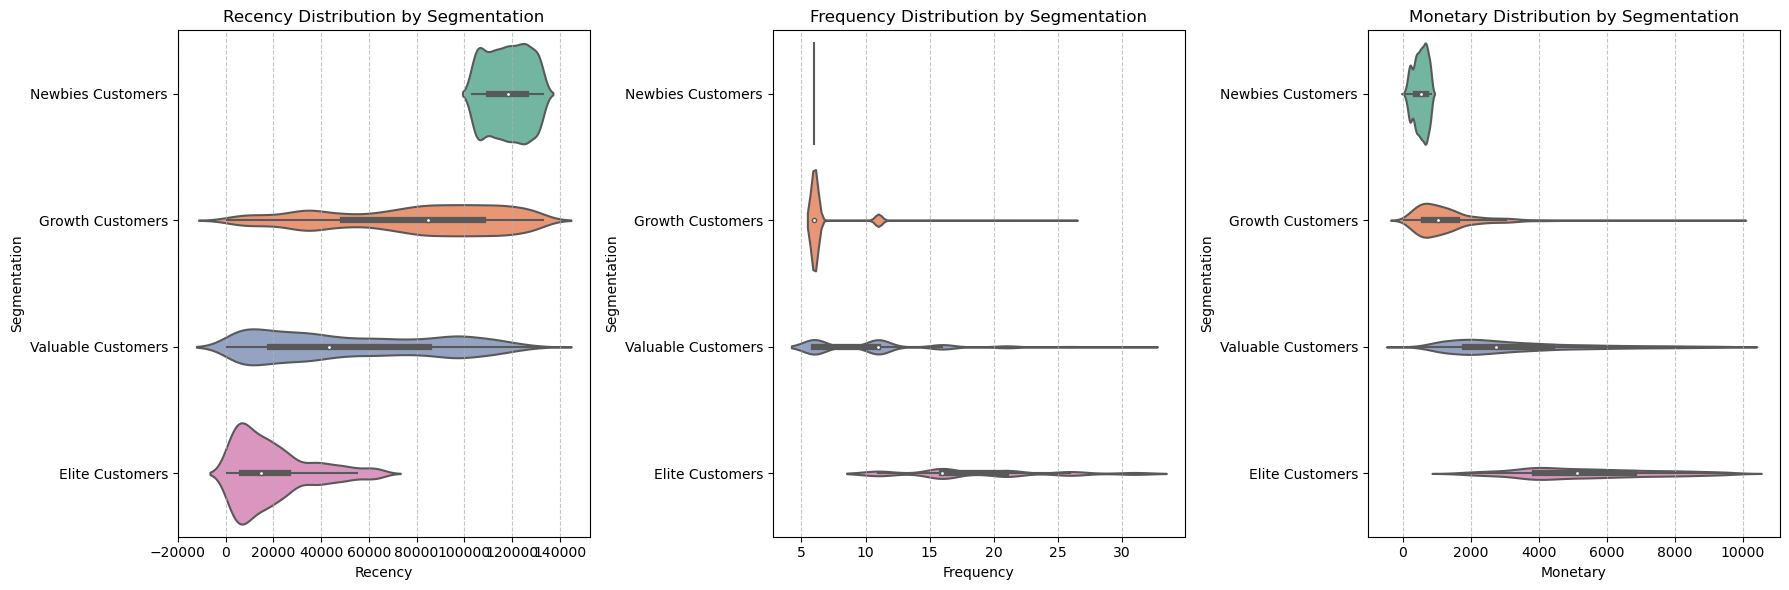

In [52]:
# Set up the figure with 3 subplots
plt.figure(figsize=(18, 6))

# Recency Distribution by Segmentation
plt.subplot(1, 3, 1)
sns.violinplot(data=binning_data, x='Recency', y='Segmentation', palette='Set2')
plt.title('Recency Distribution by Segmentation')
plt.xlabel('Recency')
plt.ylabel('Segmentation')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Frequency Distribution by Segmentation
plt.subplot(1, 3, 2)
sns.violinplot(data=binning_data, x='Frequency', y='Segmentation', palette='Set2')
plt.title('Frequency Distribution by Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Segmentation')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Monetary Distribution by Segmentation
plt.subplot(1, 3, 3)
sns.violinplot(data=binning_data, x='Monetary', y='Segmentation', palette='Set2')
plt.title('Monetary Distribution by Segmentation')
plt.xlabel('Monetary')
plt.ylabel('Segmentation')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
binning_data.groupby('Segmentation').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segmentation,,,
Newbies Customers,117982.50,6.00,509.89
Growth Customers,78488.11,6.55,1317.73
Valuable Customers,51422.55,10.67,3342.03
Elite Customers,19228.31,18.78,5389.00


1. **_Newbie Customers_**
- Highest recency (3123.12 days) - Indicates that these customers made their most recent purchase a long time ago.
- Lowest frequency (1.00) - Shows that they make infrequent purchases.
- Lowest monetary ($5.18) - Indicates very low average spending.

Characteristics :
- These customers have not engaged with the brand for a long time.
- They make purchases very rarely and spend very little when they do.

Recommendations :
- Send targeted emails or offers to re-engage these customers.
- Provide introductory discounts or promotions to encourage more frequent purchases.
- Create personalized recommendations or offers based on their previous interactions.

2. **_Growth Customers_**
- Second highest recency (3014.62 days) - Recent purchases are slightly more recent than Newbie Customers.
- Slightly higher frequency (1.11) - They make slightly more frequent purchases.
- Moderate monetary ($13.38) - Average spend is higher than Newbie Customers.

Characteristics :
- These customers are relatively more engaged than Newbie Customers but still infrequent buyers.
- Their average spending is higher, indicating a potential for increased revenue with better engagement.

Recommendations :
- Implement a loyalty program to increase their purchase frequency and retention.
- Provide exclusive offers or early access to sales to boost engagement.
- Solicit feedback to understand their needs and barriers to more frequent purchases.

3. **_Valuable Customers_**
- Moderate recency (2940.27 days) - More recent compared to Growth Customers.
- Higher frequency (1.93) - They make purchases more frequently.
- Higher monetary ($33.93) - They spend significantly more on average.

Characteristics :
- These customers are more engaged and spend more, making them valuable to the business.
- They have a relatively recent purchase history and moderate frequency.

Recommendations :
- Offer special discounts or personalized promotions to increase their purchase frequency.
- Invite them to exclusive events or product launches to enhance their loyalty.
- Suggest complementary products or services to increase their average spend.

4. **_Elite Customers_**
- Lowest recency (2851.82 days) - They have made their most recent purchases more recently.
- Highest frequency (3.56) - They purchase frequently.
- Highest monetary ($54.72) - They have the highest average spend.

Characteristics :
- These customers are highly engaged, make frequent purchases, and spend the most.
- They represent the top tier of customer base in terms of value.

Recommendations :
- Introduce a VIP program or exclusive benefits to reward and retain these high-value customers.
- Provide personalized services or offers tailored to their preferences.
- Encourage them to refer friends or colleagues by offering incentives, leveraging their high engagement and satisfaction.

**_Summary_**
1. Newbie Customers require re-engagement strategies and incentives to become more active and increase spending.
2. Growth Customers can benefit from loyalty programs and exclusive offers to enhance their engagement and spending.
3. Valuable Customers should be rewarded with special discounts and personalized offers to boost their loyalty and average spend.
4. Elite Customers should be provided with VIP benefits and personalized services to maintain their high engagement and maximize their value.

### **K-Means Clustering**

In [54]:
# Import library
from sklearn.cluster import KMeans

In [55]:
rfm_data = rfmts_data_scaled[['Recency', 'Frequency', 'Monetary']]
rfm_data

,Recency,Frequency,Monetary
Customer_ID,,,
1,0.945055,0.0,0.163993
2,0.535714,0.2,0.229793
3,1.000000,0.0,0.109464
4,0.142857,0.2,0.336617
5,0.491758,0.8,0.798944
...,...,...,...
22620,0.164835,0.0,0.085906
22621,0.057692,0.0,0.096974
22622,0.041209,0.0,0.060215


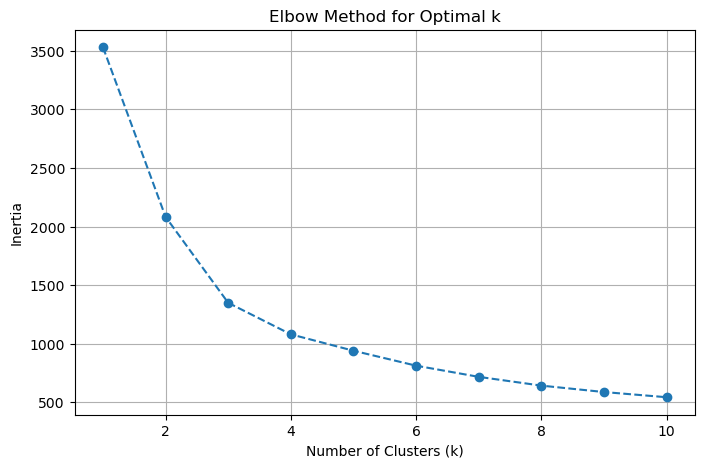

In [56]:
# List to store inertia values for different numbers of clusters
inertia = []

# Loop over a range of cluster numbers from 1 to 10
for k in range(1, 11):
    # Initialize KMeans with k clusters, a fixed random state for reproducibility, and 20 initializations
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    
    # Fit KMeans to the data
    kmeans.fit(rfm_data)
    
    # Append the inertia (sum of squared distances to closest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the "elbow" for determining the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


---

**Elbow Method**

---

- The optimal number of clusters is identified as the point where adding an additional cluster yields only a marginal decrease in Within-Cluster Sum of Squares (WCSS).
- This optimal point is typically observed as a sharp bend or "elbow" in the WCSS graph.
- Beyond this point, adding more clusters does not result in significant improvements in clustering performance.

**Mathematical Definition of WCSS**:

$$
\text{WCSS} = \sum_{j=1}^{k} \sum_{i=1}^{n} \|x_{i} - c_{j}\|^2
$$

where:
- \( n \) represents the total number of data points
- \( k \) represents the total number of clusters
- \( x_{i} \) represents the \( i \)-th data point
- \( c_{j} \) represents the centroid of the \( j \)-th cluster

---

Based on the elbow plot :
1. The plot shows inertia drops significantly when moving from 1 to 2 clusters and again from 2 to 3 clusters. This suggests that the clustering improves substantially by increasing the number of clusters from 1 to 3.
2. From k = 3 onwards, the decrease in inertia becomes less steep, indicating diminishing returns for additional clusters. While there is still a reduction in inertia when increasing from 3 to 4, 5, etc., it’s not as pronounced as the previous steps.
3. K = 3 is the strongest candidate since it balances a significant reduction in inertia with a reasonable number of clusters. It captures the major structure in the data without over-complicating the model.
4. Adding more clusters beyond k = 3 (like k = 4 or 5) shows diminishing returns in terms of inertia reduction. The improvements in cluster quality become marginal, which suggests that adding more clusters does not significantly enhance the differentiation among data points.

In [57]:
# Initialize the KMeans algorithm with the desired parameters
kmeans_ = KMeans(
    n_clusters=3,        # Set the number of clusters to 3 based on the chosen k value
    random_state=42,     # Set a random state for reproducibility of results
    n_init=20            # Number of times the algorithm will be run with different centroid seeds
)

# Fit the KMeans model to the cleaned data
kmeans_.fit(rfm_data)

KMeans(n_clusters=3, n_init=20, random_state=42)

In [58]:
# Predict the cluster labels for the data using the fitted KMeans model
cluster_labels = kmeans_.predict(rfm_data)
cluster_labels

array([2, 2, 2, ..., 1, 1, 0])

In [59]:
# Extract the coordinates of the centroids from the KMeans model
centroid = kmeans_.cluster_centers_

# Create a DataFrame with the centroid coordinates and appropriate column names
data_centroid = pd.DataFrame(centroid, columns=["Recency", "Frequency", "Monetary"])

# Rename the index to "Cluster" to represent each row as a cluster
data_centroid = data_centroid.rename_axis("Cluster", axis="index")

# Display the DataFrame with cluster centroids
data_centroid


,Recency,Frequency,Monetary
Cluster,,,
0,0.331689,0.495232,0.600857
1,0.210824,0.065928,0.175488
2,0.766271,0.059773,0.184537


In [60]:
# Transform the scaled data back to its original scale
cluster = pd.DataFrame(scaler.inverse_transform(rfmts_data_scaled))

# Set the index of the new DataFrame to match the original scaled data
cluster.index = rfmts_data_scaled.index

# Set the column names to match the original feature names
cluster.columns = rfmts_data_scaled.columns

# Select only the columns of interest (Recency, Frequency, and Monetary)
cluster = cluster[["Recency", "Frequency", "Monetary"]]

# Add the cluster labels to the DataFrame
cluster['Label'] = cluster_labels

# Display the first few rows of the DataFrame with original scale data and cluster labels
cluster.head()

,Recency,Frequency,Monetary,Label
Customer_ID,,,,
1,345.0,1.0,16.29,2
2,196.0,2.0,22.77,2
3,365.0,1.0,10.92,2
4,53.0,2.0,33.29,1
5,180.0,5.0,78.82,0


In [61]:
# Group the data by cluster label and calculate aggregate statistics
cluster_summary = cluster.groupby('Label').agg({
    # Calculate the mean for Recency, Frequency, and Monetary
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    # Count the number of records in each cluster
    'Label': 'count',
}).round(2)  # Round the results to two decimal places

# Rename the count column from 'label' to 'Total Customer'
cluster_summary = cluster_summary.rename(columns={'Label': 'Total Customer'})

# Display the summary
cluster_summary


,Recency,Frequency,Monetary,Total Customer
Label,,,,
0,121.68,3.48,59.34,3121
1,77.75,1.33,17.43,6773
2,279.90,1.30,18.31,8290


- Cluster 0 = Top Tier Customers (low recency, high frequency and high monetary)
- Cluster 1 = Regular Customers (low recency, medium frequency and low monetary)
- Cluster 2 = Passive Customers (high recency, low frequency and low monetary)

In [62]:
# Function to assign customer types based on cluster label
def assign_label(label):
    if label == 0:
        return 'Top Tier Customer' 
    elif label == 1:
        return 'Regular Customer'  
    else:
        return 'Passive Customer'    

# Apply the function to the 'label' column to create 'Customer_Type' column
cluster['Customer Type'] = cluster['Label'].apply(assign_label)

# Check the first few rows of the DataFrame to verify the result
cluster.head()

,Recency,Frequency,Monetary,Label,Customer Type
Customer_ID,,,,,
1,345.0,1.0,16.29,2,Passive Customer
2,196.0,2.0,22.77,2,Passive Customer
3,365.0,1.0,10.92,2,Passive Customer
4,53.0,2.0,33.29,1,Regular Customer
5,180.0,5.0,78.82,0,Top Tier Customer


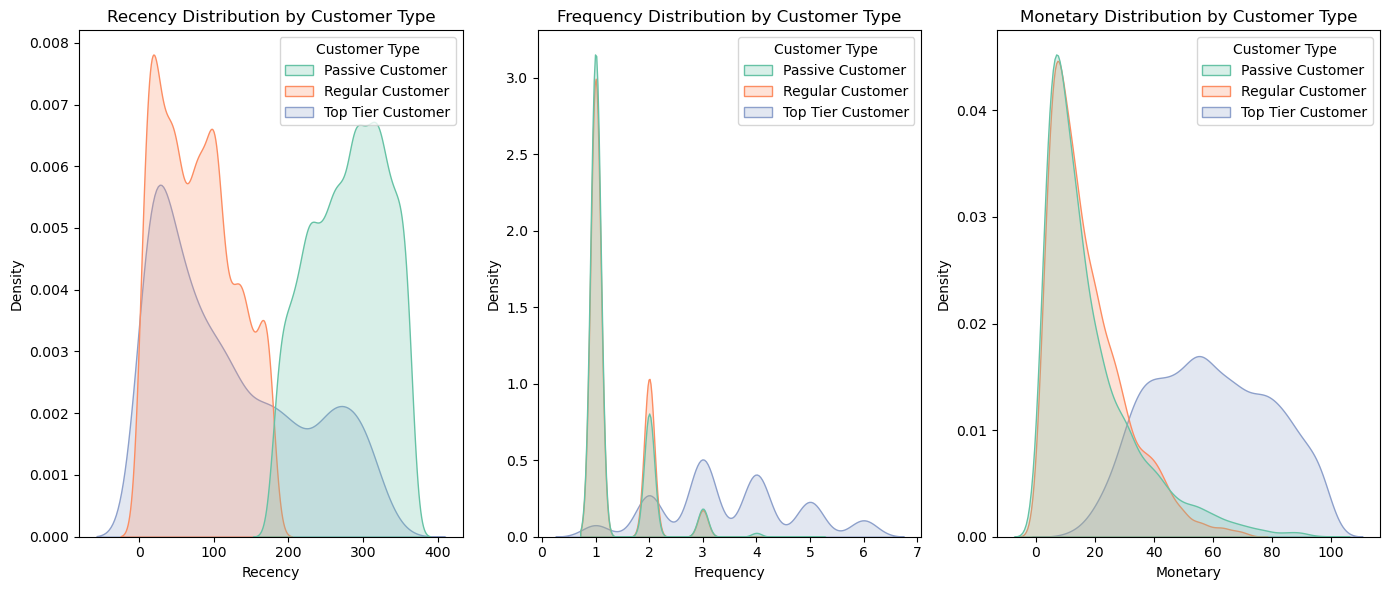

In [63]:
plt.figure(figsize=(14, 6))

# Distribution for Recency
plt.subplot(1, 3, 1)
sns.kdeplot(data=cluster, x='Recency', hue='Customer Type', fill=True, common_norm=False, palette='Set2')
plt.title('Recency Distribution by Customer Type')
plt.xlabel('Recency')
plt.ylabel('Density')

# Distribution for Frequency
plt.subplot(1, 3, 2)
sns.kdeplot(data=cluster, x='Frequency', hue='Customer Type', fill=True, common_norm=False, palette='Set2')
plt.title('Frequency Distribution by Customer Type')
plt.xlabel('Frequency')
plt.ylabel('Density')

# Distribution for Monetary
plt.subplot(1, 3, 3)
sns.kdeplot(data=cluster, x='Monetary', hue='Customer Type', fill=True, common_norm=False, palette='Set2')
plt.title('Monetary Distribution by Customer Type')
plt.xlabel('Monetary')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

- Cluster 0 = Top Tier Customers (low recency, high frequency and high monetary)

Business recommendations :
1. Implement exclusive loyalty programs that reward continued engagement, such as points systems, tiered membership benefits, or special access to new products and services.
2. Use personalized marketing to offer product recommendations, exclusive discounts, or early access to sales events tailored to their preferences.
3. Provide exceptional customer service and VIP experiences, such as personal shopping assistants, exclusive invitations to events, or priority customer support.


- Cluster 1 = Regular Customers (low recency, medium frequency and low monetary)

Business recommendations :
1. Offer bundle deals, volume discounts, or limited-time offers to encourage these customers to increase their spending per transaction.
2. Implement campaigns that encourage more frequent interactions, such as loyalty rewards for repeat purchases or time-limited promotions.
3. Provide product education through email campaigns or personalized content that highlights the benefits of higher-value products.

- Cluster 2 = Passive Customers (high recency, low frequency and low monetary)

Business recommendations :
1. Use targeted re-engagement campaigns such as welcome back offers, personalized discounts, or reminders of abandoned carts to encourage them to make another purchase.
2. Provide onboarding resources, such as tutorials, product guides, or educational content to better acquaint them with the brand's offerings.
3. Track their behavior closely and adjust strategies based on what engages them most effectively. Use A/B testing for offers and messaging to identify the most successful approaches. 

In [64]:
clean_data = pd.DataFrame(scaler.inverse_transform(rfmts_data_scaled))

clean_data.index = rfmts_data_scaled.index

clean_data.columns = rfmts_data_scaled.columns
clean_data

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
1,345.0,0.0,1.0,16.29
2,196.0,87.0,2.0,22.77
3,365.0,0.0,1.0,10.92
4,53.0,121.0,2.0,33.29
5,180.0,147.0,5.0,78.82
...,...,...,...,...
22620,61.0,0.0,1.0,8.60
22621,22.0,0.0,1.0,9.69
22622,16.0,0.0,1.0,6.07


In [65]:
clean_data.describe()

,Recency,Tenure,Frequency,Monetary
count,18184.000000,18184.000000,18184.000000,18184.000000
mean,177.452596,31.076716,1.684503,25.027259
std,112.650079,56.257316,1.096333,22.076842
min,1.000000,0.000000,1.000000,0.140000
25%,72.000000,0.000000,1.000000,8.430000
50%,182.000000,0.000000,1.000000,17.085000
75%,283.000000,41.000000,2.000000,35.210000
max,365.000000,232.000000,6.000000,98.620000


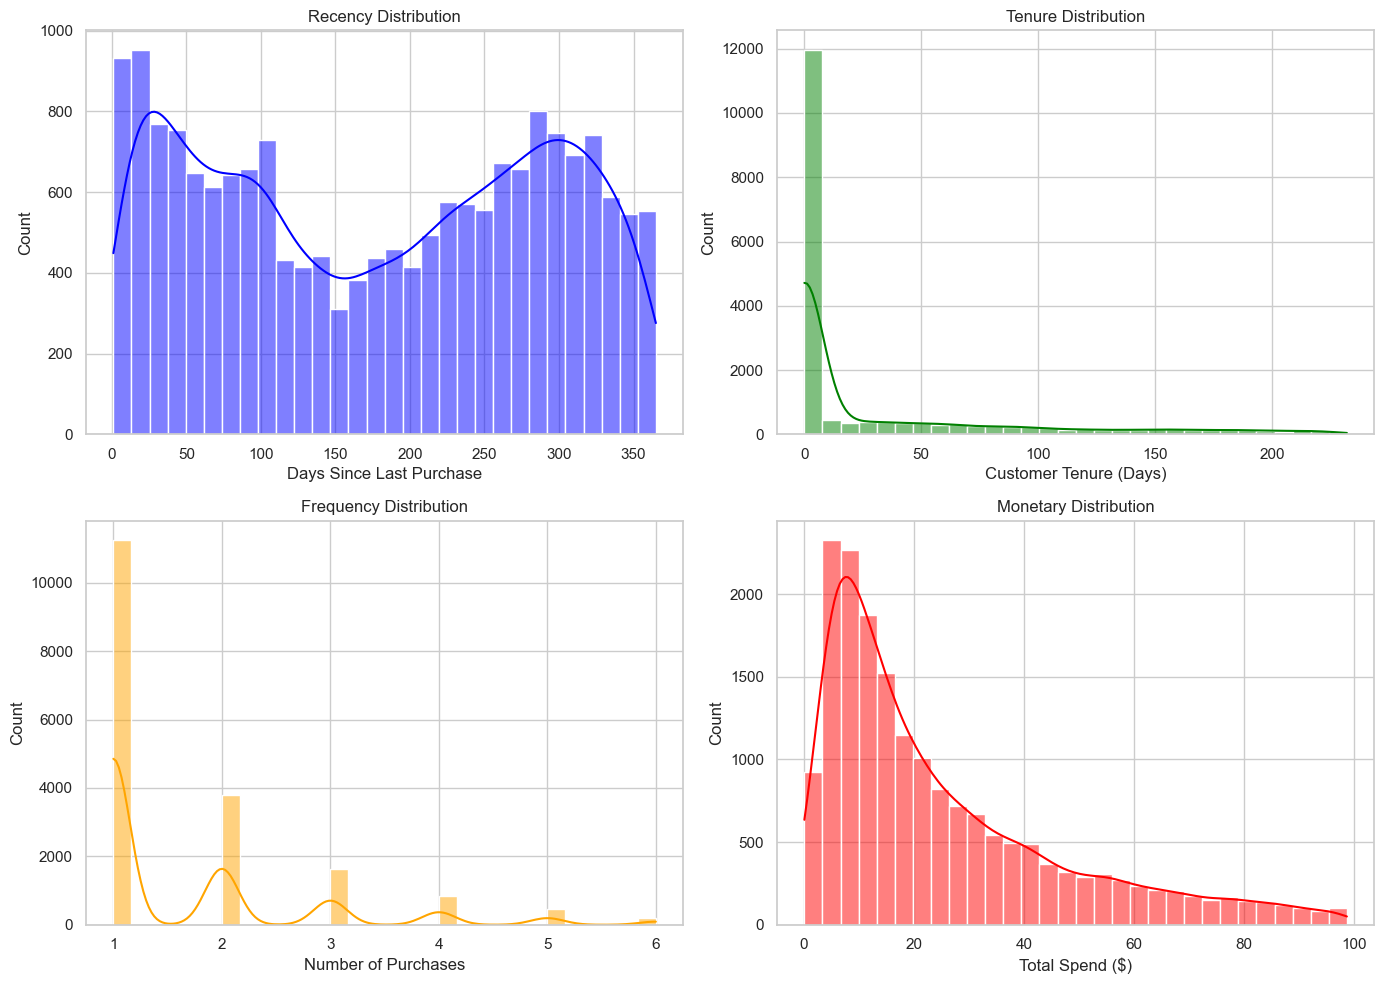

In [66]:
# Set plot style
sns.set(style='whitegrid')

# Histograms and KDE Plots for Distribution
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(clean_data['Recency'], kde=True, color='blue', bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

plt.subplot(2, 2, 2)
sns.histplot(clean_data['Tenure'], kde=True, color='green', bins=30)
plt.title('Tenure Distribution')
plt.xlabel('Customer Tenure (Days)')

plt.subplot(2, 2, 3)
sns.histplot(clean_data['Frequency'], kde=True, color='orange', bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

plt.subplot(2, 2, 4)
sns.histplot(clean_data['Monetary'], kde=True, color='red', bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Total Spend ($)')

plt.tight_layout()
plt.show()

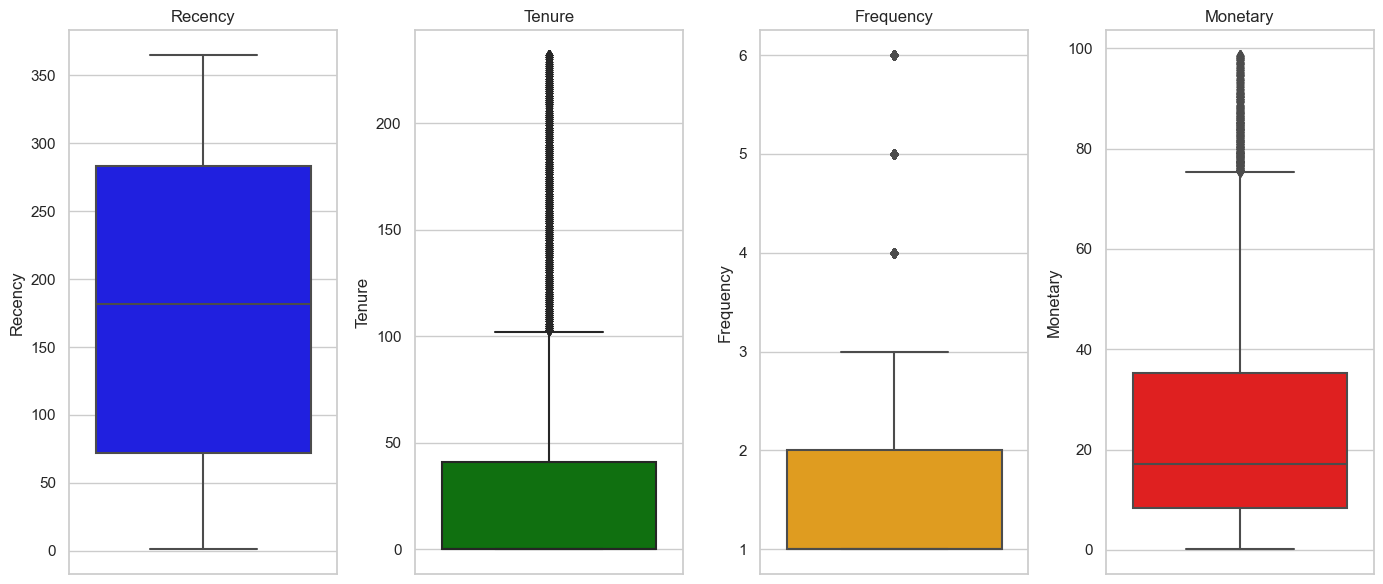

In [67]:
# Box Plots for Outlier Detection
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y=clean_data['Recency'], color='blue')
plt.title('Recency')

plt.subplot(1, 4, 2)
sns.boxplot(y=clean_data['Tenure'], color='green')
plt.title('Tenure')

plt.subplot(1, 4, 3)
sns.boxplot(y=clean_data['Frequency'], color='orange')
plt.title('Frequency')

plt.subplot(1, 4, 4)
sns.boxplot(y=clean_data['Monetary'], color='red')
plt.title('Monetary')

plt.tight_layout()
plt.show()

In [68]:
cluster

,Recency,Frequency,Monetary,Label,Customer Type
Customer_ID,,,,,
1,345.0,1.0,16.29,2,Passive Customer
2,196.0,2.0,22.77,2,Passive Customer
3,365.0,1.0,10.92,2,Passive Customer
4,53.0,2.0,33.29,1,Regular Customer
5,180.0,5.0,78.82,0,Top Tier Customer
...,...,...,...,...,...
22620,61.0,1.0,8.60,1,Regular Customer
22621,22.0,1.0,9.69,1,Regular Customer
22622,16.0,1.0,6.07,1,Regular Customer


In [69]:
rfm_agg = cluster.groupby('Customer Type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Label': 'count',
}).round(2)

# Rename the count column
rfm_agg.columns = ["Recency", "Frequency", "Monetary", "Count Customers"]

# Calculate the total monetary value per segment
rfm_agg['Total Monetary'] = (rfm_agg['Monetary'] * rfm_agg['Count Customers']).round(2)

# Calculate percentage revenue per segment
rfm_agg['% Revenue'] = np.round(rfm_agg['Total Monetary'] / rfm_agg['Total Monetary'].sum() * 100, 2)

# Calculate average revenue per transaction
rfm_agg['Avg Revenue per Transaction'] = (rfm_agg['Monetary'] / rfm_agg['Frequency']).round(2)

# Calculate percentage of total customers in each segment
rfm_agg['% of Total Customers'] = np.round(rfm_agg['Count Customers'] / rfm_agg['Count Customers'].sum() * 100, 2)

# Include median or percentile of Recency
rfm_agg['Median Recency'] = cluster.groupby('Customer Type')['Recency'].median().round(2)

# Include standard deviation of Monetary to understand spending variability
rfm_agg['Monetary Std Dev'] = cluster.groupby('Customer Type')['Monetary'].std().round(2)

# Display the enhanced aggregation table
rfm_agg

,Recency,Frequency,Monetary,Count Customers,Total Monetary,% Revenue,Avg Revenue per Transaction,% of Total Customers,Median Recency,Monetary Std Dev
Customer Type,,,,,,,,,,
Passive Customer,279.90,1.30,18.31,8290,151789.90,33.36,14.08,45.59,284.0,15.75
Regular Customer,77.75,1.33,17.43,6773,118053.39,25.94,13.11,37.25,74.0,12.70
Top Tier Customer,121.68,3.48,59.34,3121,185200.14,40.70,17.05,17.16,97.0,20.23


*Analysis and Business Insights*
1. Total monetary shows the absolute contribution of each customer segment to the total revenue. For instance, if Top Tier Customers contribute the highest total monetary value, it confirms their critical role in driving revenue, despite possibly having a smaller population.
2. Top Tier Customers should ideally have a high average revenue per transaction, highlighting their high spending power per purchase. Lower values in Passive Customers suggest opportunities for upselling or cross-selling.
3. Percentage of Total Customers helps gauge the size of each segment to the entire customer base. A high percentage coming from Passive Customer.
4. The median recency offers a better understanding of how recent interactions are within each segment. For instance, Top Tier Customers might show low recency values (more recent transactions), reflecting their ongoing engagement.
5. A high standard deviation in monetary value among Top Tier Customers might indicate a wide variety in spending behaviors.
6. Top Tier Customers are the most valuable in terms of revenue per transaction and total monetary contribution, but they might be fewer in number. Focusing on personalized offers and loyalty programs can enhance retention and maximize value from this group.
7. Regular Customers demonstrate consistent spending but at a lower frequency. Increasing engagement through reminder communications, personalized offers, and loyalty incentives could convert them into Top Tier status.
8. Passive Customers represent a large group with high potential, but their low frequency and high recency indicate they are less engaged. Strategies to re-engage, such as targeted marketing, personalized content, and reactivation campaigns, could help unlock their potential.

Based on the detailed RFM segmentation analysis of **Top Tier Customers**, **Regular Customers** and **Passive Customers**, here's a strategic plan tailored to the business objectives of a retail company (RetailCo). This plan includes both short-term (0-3 months), mid-term (3-6 months) and long-term (6+ months) strategies to maximize customer lifetime value and drive overall revenue growth.

##### 1. **Top Tier Customers**
- Characteristic :
    - Highest frequency of purchases (3.48 times on average).
    - Highest monetary value per transaction (average $59.34).
    - Contributes the most to total revenue (40.70%).
    - Recency of purchases is relatively frequent.
    - Count Customers is 3,121 (17.16% of total customers).
- Short-Term Strategy (0-3 Months) :
    - Implement a VIP rewards program offering exclusive discounts, early access to new products, or personalized offers. This could be targeted at the top 10% of this group to further increase their spend.
    - Send personalized promotions every 3 months tailored to previous purchase patterns, encouraging repeat purchases.
    - Offer free premium services like expedited shipping or personal shopping assistance.
- Mid-Term Strategy (3-6 Months) :
    - Introduce subscription models for frequently purchased items to ensure engagement.
    - Encourage referrals by offering incentives to both the referrer and the new customer, expanding the high-value customer base.
- Long-Term Strategy (6+ Months) :
    - Develop a tiered loyalty program to keep them engaged and reward continued high spending
    - Regularly analyze their purchase patterns to identify early signs of disengagement and address these promptly.

##### 2. **Regular Customers**
- Characteristic :
    - Moderate frequency (1.33) and low monetary value ($17.43) per transaction.
    - Contributes 25.94% to total revenue.
    - Slightly more recent in purchases than the other segments.
    - Count Customers is 6,773 (37.25% of total customers).
- Short-Term Strategy (0-3 Months) :
    - Use email and online prompts to suggest complementary products during checkout to increase transaction value.
    - Create campaigns every 3 months targeting past buyers with special discounts to re-engage them.
- Mid-Term Strategy (3-6 Months) :
    - Offer escalating discounts based on purchase frequency within a set period to encourage more regular buying.
    - Align promotions with seasonal trends or holidays, leveraging broader marketing efforts to pull these customers back.
- Long-Term Strategy (6+ Months) :
    - Solicit feedback regularly to identify ways to enhance their shopping experience and cater to their preferences.
    - Use data to automatically retarget this segment with personalized offers across digital channels to maintain ongoing engagement.

##### 3. **Passive Customers**
- Characteristic :
    - Highest number of customers (8,290).
    - Moderate recency but lower frequency and monetary value per transaction.
    - Significant contributor to revenue (33.36%).
    - Count Customers is 8,290 (45.59% of total customers, largest segment).
- Short-Term Strategy (0-3 Months) :
    - Initiate campaigns with time-sensitive offers, such as "Buy More, Save More" or discounts on frequently purchased items.
    - Offer time-limited discounts (e.g., valid for 30 days) to encourage quicker repeat transactions.
    - Send reactivation offers every 2 months, such as discounts or free shipping on the next purchase, to stimulate purchase frequency.
- Mid-Term Strategy (3-6 Months) :
    - Promote bundles of frequently bought together items at a discounted price to increase basket size and transaction value.
    - Gather feedback to understand what additional needs.
- Long-Term Strategy (6+ Months) :
    - Provide valuable content about products, trends, or exclusive insights to keep them engaged with the brand outside of purchase occasions.